## Assignment 1:

Take your data cleaning and exploratory data analysis further and uncover at least 2 additional actionable insights as an outcome of EDA.

In [121]:
python_material_folder_name = "python-material"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##  2.1 Data Collection

In [151]:
# Read data that was exported from previous session
df = pd.read_csv(f"{path_python_material}/data/2-intermediate/df_out_dsif2.csv")
df.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hardship_status_filled,last_pymnt_amnt_log,last_pymnt_amnt_capped,loan_id_extracted,emp_title_clean,emp_title_manager,Job Title,Category
0,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-20,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1,Dec-04,665,669,0,19.0,110.0,4,1,1988,82.80%,12,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-20,134.93,Jun-20,May-20,669,665,1.0,NaN,1,Individual,NaN,NaN,NaN,0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,4.912140,134.93,167338079,cashier,False,NaN,NaN
1,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-16,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0,Jan-04,680,684,0,NaN,NaN,10,0,22697,64.50%,24,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-20,500.07,Jun-20,May-20,704,700,0.0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,6.2167

## Loan Purpose and Grade
  **Analysis:** Investigate how different loan purposes and grades affect loan performance. Certain purposes or grades may have higher default rates.

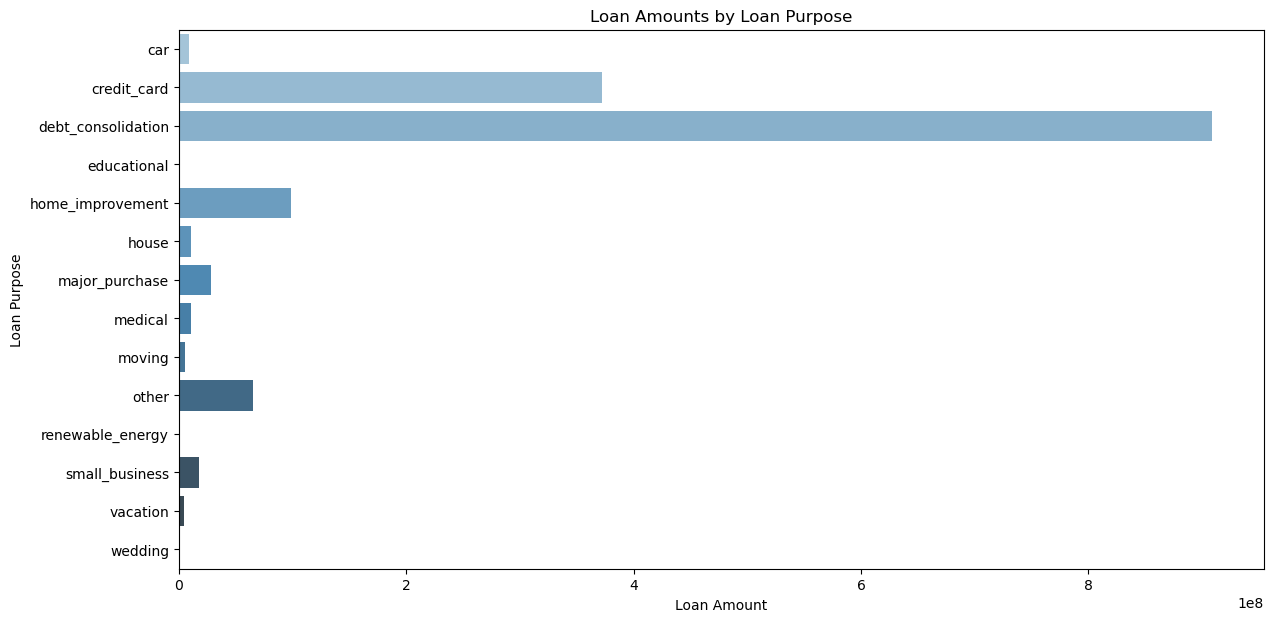

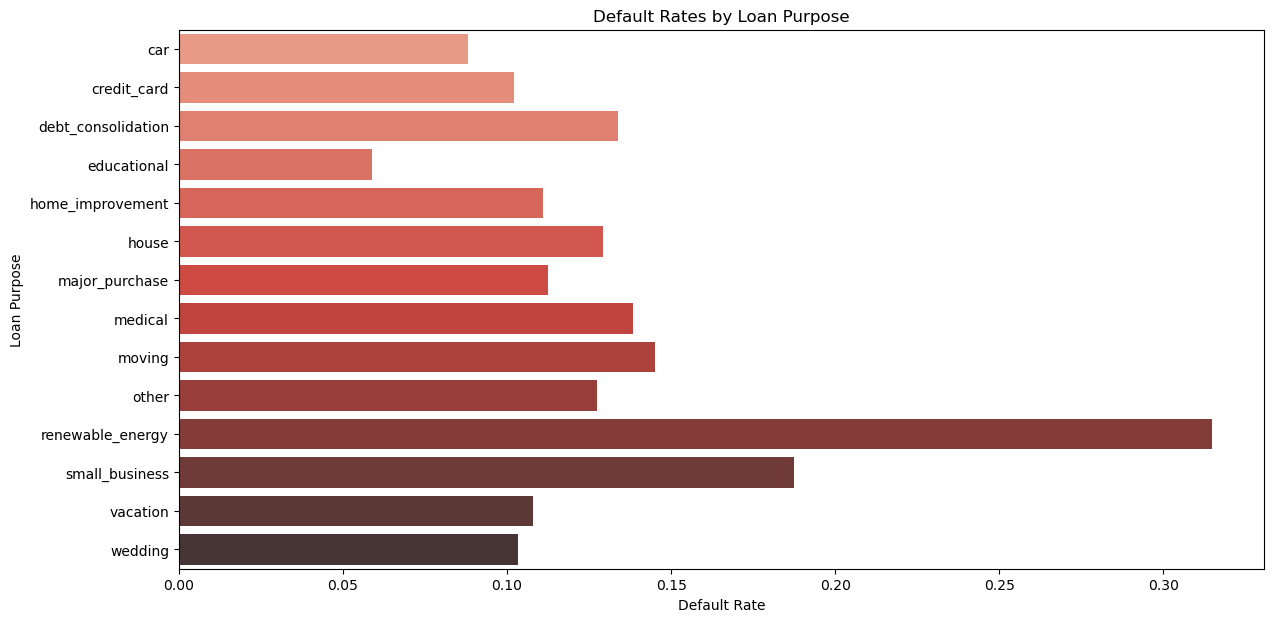

In [141]:
# Data preprocessing
df = df[['purpose', 'loan_amnt', 'loan_status']]

# Create a new column 'default'. If the loan_status is either Charged Off or Default, set the value to 1 (indicating a default), otherwise, set it to 0.
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# Aggregation
loan_amounts = df.groupby('purpose')['loan_amnt'].sum()  # Group by purpose and sum the loan_amnt for each purpose.
default_rates = df.groupby('purpose')['default'].mean()  # Group by purpose and calculate the mean of the default column to get the default rate for each purpose.

# Combine the data into a single DataFrame for easier plotting
combined_data = pd.DataFrame({
    'loan_amounts': loan_amounts,
    'default_rates': default_rates
}).reset_index()

# Visualization: Loan Amounts by Loan Purpose
plt.figure(figsize=(14, 7))
sns.barplot(x='loan_amounts', y='purpose', hue='purpose', data=combined_data, palette='Blues_d', dodge=False)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Purpose')
plt.title('Loan Amounts by Loan Purpose')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

# Visualization: Default Rates by Loan Purpose
plt.figure(figsize=(14, 7))
sns.barplot(x='default_rates', y='purpose', hue='purpose', data=combined_data, palette='Reds_d', dodge=False)
plt.xlabel('Default Rate')
plt.ylabel('Loan Purpose')
plt.title('Default Rates by Loan Purpose')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

## Actionable insights for Loan Purpose w.r.t. default rate and loan amount
- Given the high default rate and low loan amounts, consider discontinuing or restructuring the renewal loan program. 
  Evaluate whether the resources spent on managing these loans are justified by their performance.

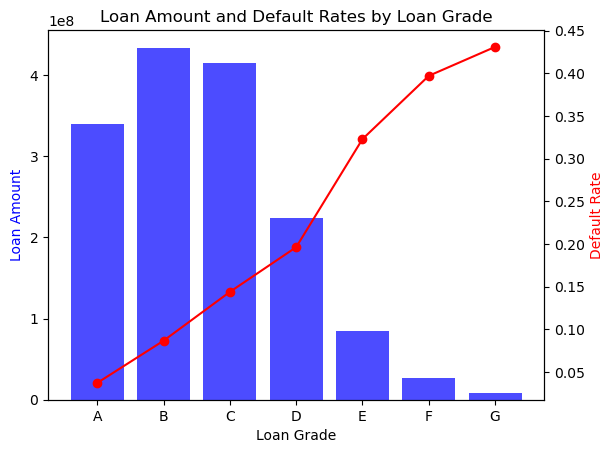

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
df = df[['grade', 'loan_amnt', 'loan_status']] 

# A new column default is created. 
#If the loan_status is either Charged Off or Default, the value is set to 1 (indicating a default), otherwise, it's set to 0.
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# Aggregation
loan_amounts = df.groupby('grade')['loan_amnt'].sum() #The loan_amounts series is created by grouping the data by grade and summing up the loan_amnt for each grade.
default_rates = df.groupby('grade')['default'].mean() #The default_rates series is created by grouping the data by grade and calculating the mean of the default column. This gives the default rate for each grade.

# Visualization
fig, ax1 = plt.subplots()

# Bar plot for loan amounts
ax1.bar(loan_amounts.index, loan_amounts.values, color='b', alpha=0.7)
ax1.set_xlabel('Loan Grade')
ax1.set_ylabel('Loan Amount', color='b')

# Create a second y-axis for default rates
ax2 = ax1.twinx()
ax2.plot(default_rates.index, default_rates.values, color='r', marker='o')
ax2.set_ylabel('Default Rate', color='r')

plt.title('Loan Amount and Default Rates by Loan Grade')
plt.xticks(rotation=45)
plt.show()

## Actionable Insights for Grade w.r.t. default rate and loan amount:
- Adjust interest rates to reflect risk:
    Lower rates for grades B, C, and A to attract more borrowers while maintaining profitability.
    Higher rates for grades E, F, and G to offset higher default risks.
  
- We can provide some financial aids to grade E,F and G. 
- Implement stringent monitoring and early warning systems for grades E, F, and G to detect and address potential defaults early.

## Revolving Balance and Utilization

**Analysis:** Evaluate how revolving balances and utilization rates impact loan performance. Higher utilization rates can indicate higher financial stress.


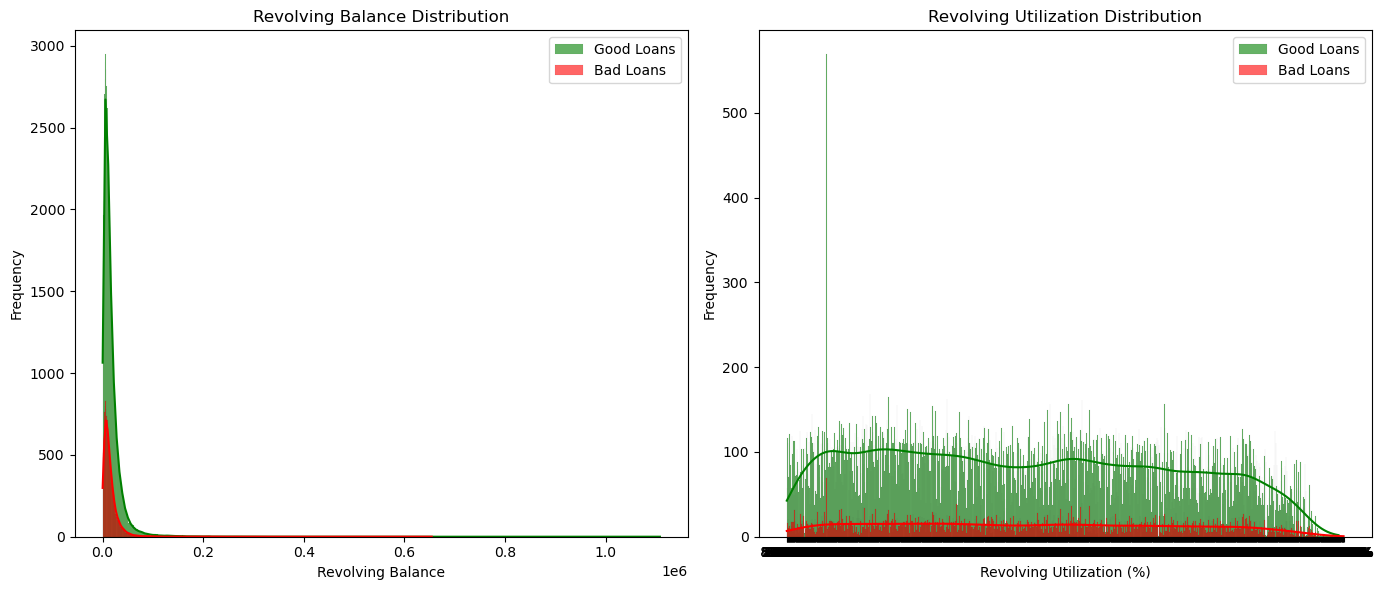

In [155]:
# Data preprocessing
df = df[['revol_bal', 'revol_util', 'loan_status']]

# Data cleaning: Remove rows with missing or invalid values
df = df.dropna(subset=['revol_bal', 'revol_util'])

# Define a function to categorize loan status
def categorize_loan_status(status):
    if status in ['Fully Paid', 'Current']:
        return 'Good'
    else:
        return 'Bad'

# Apply the function to categorize loan status
df['loan_performance'] = df['loan_status'].apply(categorize_loan_status)

# Analysis: Evaluate the relationship
good_loans = df[df['loan_performance'] == 'Good']
bad_loans = df[df['loan_performance'] == 'Bad']

# Visualization
plt.figure(figsize=(14, 6))

# Revolving Balance
plt.subplot(1, 2, 1)
sns.histplot(good_loans['revol_bal'], color='green', kde=True, label='Good Loans', alpha=0.6)
sns.histplot(bad_loans['revol_bal'], color='red', kde=True, label='Bad Loans', alpha=0.6)
plt.title('Revolving Balance Distribution')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.legend()

# Revolving Utilization
plt.subplot(1, 2, 2)
sns.histplot(good_loans['revol_util'], color='green', kde=True, label='Good Loans', alpha=0.6)
sns.histplot(bad_loans['revol_util'], color='red', kde=True, label='Bad Loans', alpha=0.6)
plt.title('Revolving Utilization Distribution')
plt.xlabel('Revolving Utilization (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Actionable insights for Revolving Balance and Utilization:
- Educate borrowers on the importance of maintaining low utilization rates. 
- Encourage them to keep their credit card balances low and avoid maxing out their credit limits.
 